data   coverage in y/x: (0, 0, 360, 300)
subset coverage in y/x: (0, 0, 360, 300)
data   coverage in lat/lon: (131.1500975, 33.149906, 131.27009629999998, 33.049907000000005)
subset coverage in lat/lon: (131.1500975, 33.149906, 131.27009629999998, 33.049907000000005)
------------------------------------------------------------------------
colormap: jet
data    unit: m/yr
display unit: cm/yr
data    range: -2.17494231688 - 0.834711721442
display range: -2 - 2
reading DEM: gsi10m_30m.dem ...
display data in transparency: 1.0
plot in Lat/Lon coordinate
map projection: cyl
plotting DEM background ...
show shaded relief DEM
show contour in step - 200.0 m with smoothing factor - 3.0
plotting Data ...
plot scale bar
plot reference point


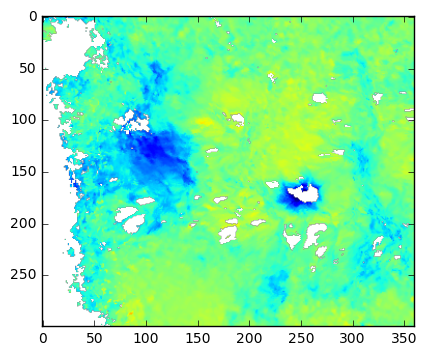

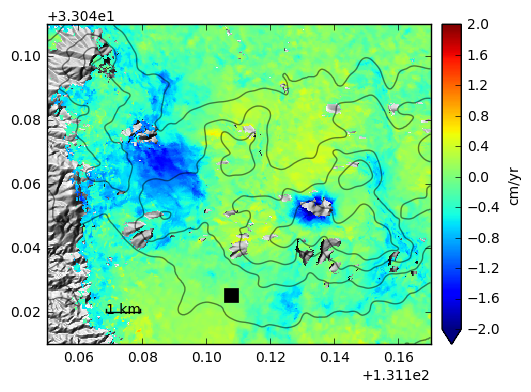

In [5]:
#! /usr/bin/env python

import matplotlib.pyplot as plt
import pysar._readfile as readfile
import pysar.view as view

dataDir = '/Users/jeromezhang/Documents/insarlab/Kyushu/Volcanoes/Kuju/AlosAT422'
velFile = dataDir+'/velocity_ex_masked.h5'

# Read any file using readfile.read()
data, atr = readfile.read(velFile)


# Opt 1. plot using matplot directly
fig1 = plt.figure(1)
im = plt.imshow(data, vmin=-0.02, vmax=0.02)


# Opt 2. plot using pysar.view module
# showing lat/lon, colorbar, scalebar, DEM background, reference point, etc.
# 2.1 Initiate a namespace object inps
inps = view.cmdLineParse([''])
inps = view.update_plot_inps_with_meta_dict(inps, atr)
# 2.2 change default values
inps.disp_unit = 'cm/yr'
inps.disp_min = -2
inps.disp_max = 2
inps.dem_file = dataDir+'/gsi10m_30m.dem'
# 2.3 Plot
fig2 = plt.figure(2)
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2, inps = view.plot_matrix(ax2, data, atr, inps)
del inps

plt.show()
